# Entwurf PID-Regler für P-Tn-Strecke nach Ziegler-Nichols Schwingmethode


In [52]:
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import os
import control
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#Regelstrecke (P-T3)
strecke=control.series(control.tf([1], [2,1]), control.tf([1], [3,1]), control.tf([1], [5,1]))

Ab zur Stabilitätsgrenze!


In [53]:
@interact(K_PR=(5,15,0.1))
def f(K_PR=2):
    #Einfacher P-Regler
    regler = control.tf([K_PR], [1])

    #Der Regelkreis ist die Seriell-Schaltung von regler und strecke und eine 1:1-Rückkopplung mit negativem Vorzeichen
    regelkreis= control.feedback(control.series(regler, strecke), control.tf([1], [1]), -1)
    #und da geben wir jetzt einen Sprung drauf
    T = np.arange(0, 50, 0.1)
    (t, y) = control.step_response(regelkreis, T)
    #und jetzt wird geplottet
    fig, ax = plt.subplots(figsize=(20, 5))

    ax.plot(t, y)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_ylim([0, 3])
    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which='major', color='#DDDDDD')
    ax.grid(which='minor', color='#EEEEEE', linestyle=':')

    plt.show()
    return;

interactive(children=(FloatSlider(value=5.0, description='K_PR', max=15.0, min=5.0), Output()), _dom_classes=(…

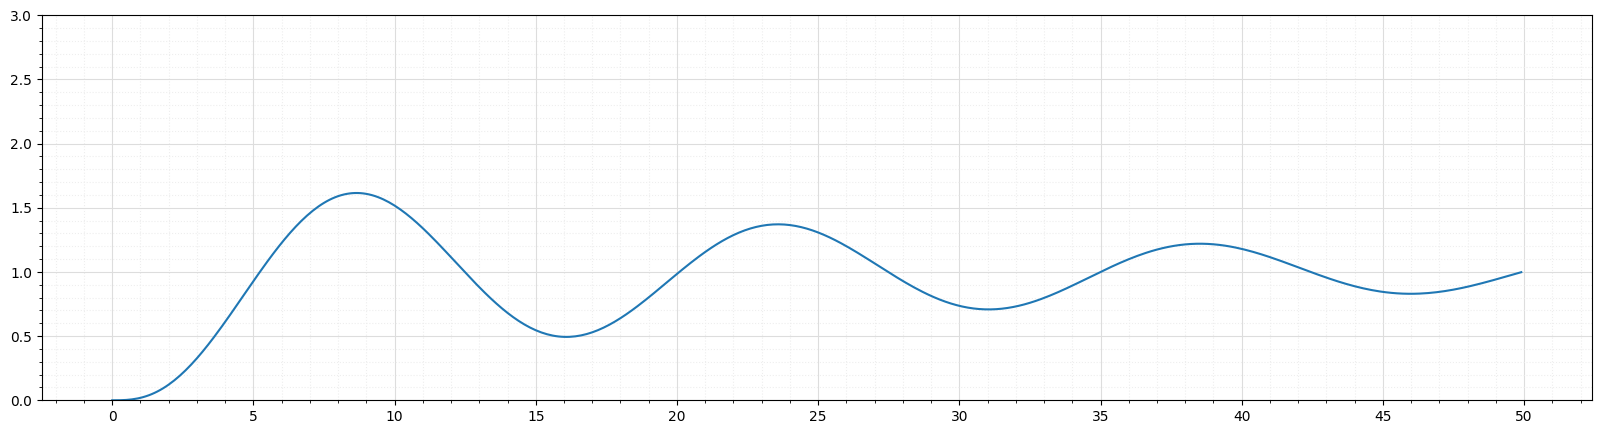

In [64]:
T_krit=11
K_PR_krit=9.4

#Ziel ist ein PI-Regler
K_PR=0.46*K_PR_krit
T_N=0.85*T_krit
#Einfacher PI-Regler
s=control.TransferFunction.s
regler = K_PR*(1+1/(T_N*s))
#Der Regelkreis ist die Seriell-Schaltung von regler und strecke und eine 1:1-Rückkopplung mit negativem Vorzeichen
regelkreis= control.feedback(control.series(regler, strecke), control.tf([1], [1]), -1)
#und da geben wir jetzt einen Sprung drauf
T = np.arange(0, 50, 0.1)
(t, y) = control.step_response(regelkreis, T)
#und jetzt wird geplottet
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(t, y)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim([0, 3])
# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='major', color='#DDDDDD')
ax.grid(which='minor', color='#EEEEEE', linestyle=':')

plt.show()